# 01 Importing Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy
from collections import Counter
import os

# 02 Importing Dataset

In [19]:
path = r'C:\Users\Ratul\anaconda_projects\7-2025 Zomatto Analysis'
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'zomato_clean.csv'), index_col = False)

In [20]:
#Checking data structure

In [21]:
df.head()

,Unnamed: 0,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),rating_category
0,0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,High rating
1,1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari,High rating
2,2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,Average rating
3,3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari,Average rating
4,4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari,Average rating


In [22]:
#Get shape of dataset
df.shape

(51717, 15)

# 03 Cleaning

In [23]:
#Changing the rating to numerator only 
df['rate'] = df['rate'].str.split('/').str[0]

In [24]:
df.head()

,Unnamed: 0,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),rating_category
0,0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,High rating
1,1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari,High rating
2,2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,Average rating
3,3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari,Average rating
4,4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari,Average rating


#### Changing data type to numeric where applicable

In [25]:
#Display datatype
print(df.dtypes)

Unnamed: 0                       int64
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
listed_in(type)                 object
listed_in(city)                 object
rating_category                 object
dtype: object


Changing 'rate' and 'approx_cost(for two people)' to numeric

In [29]:
#Remove any non-numeric characters (like commas in votes)

# Handle 'NEW' values by replacing them with NaN
df['rate'] = df['rate'].replace('NEW', float('nan'))

# Also handle '-' values by replacing them with NaN
df['rate'] = df['rate'].replace('-', float('nan'))  # Added this line to handle dash characters

# Now convert to float
df['rate'] = df['rate'].astype(float)

In [30]:
# Clean and convert 'approx_cost(for two people)' to int
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '')
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce').astype('Int64')

In [31]:
#Display datatype
print(df.dtypes)

Unnamed: 0                       int64
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
listed_in(type)                 object
listed_in(city)                 object
rating_category                 object
dtype: object


Convert the rest of the datatypes to 'str' to save space and work more efficiently

In [33]:
df['address'] = df['address'].astype('string')

In [34]:
df['name'] = df['name'].astype('string')

In [35]:
df['online_order'] = df['online_order'].astype('string')

In [36]:
df['book_table'] = df['book_table'].astype('string')

In [37]:
df['location'] = df['location'].astype('string')

In [38]:
df['rest_type'] = df['rest_type'].astype('string')

In [39]:
df['dish_liked'] = df['dish_liked'].astype('string')

In [40]:
df['cuisines'] = df['cuisines'].astype('string')

In [41]:
df['listed_in(type)'] = df['listed_in(type)'].astype('string')

In [42]:
df['listed_in(city)'] = df['listed_in(city)'].astype('string')

# 04 Simple Stats 

In [43]:
#Describe
df.describe()

,Unnamed: 0,rate,votes,approx_cost(for two people)
count,51717.000000,41665.000000,51717.000000,51371.000000
mean,25858.000000,3.700449,283.697527,555.431566
std,14929.556273,0.440513,803.838853,438.850728
min,0.000000,1.800000,0.000000,40.000000
25%,12929.000000,3.400000,7.000000,300.000000
50%,25858.000000,3.700000,41.000000,400.000000
75%,38787.000000,4.000000,198.000000,650.000000
max,51716.000000,4.900000,16832.000000,6000.000000


#### i) Count Online Orders vs Other

In [44]:
df['online_order'].value_counts()

online_order
Yes    30444
No     21273
Name: count, dtype: Int64

#### ii) Count Booked table vs Not

In [45]:
df['book_table'].value_counts()

book_table
No     45268
Yes     6449
Name: count, dtype: Int64

#### iii) Count Restaurants listed

In [46]:
df['name'].value_counts()

name
Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Homies                                                      1
Jai Bhavani Savaji Hotel                                    1
Angel's Kitchen                                             1
Hunan Express                                               1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: count, Length: 8792, dtype: Int64

#### iv) Find the most common cuisines

In [47]:
#Drop missing values and split cuisines by comma
cuisine_series = df['cuisines'].dropna().apply(lambda x: [c.strip() for c in x.split(',')])

#Flatten the list and count each cuisine
cuisine_counts = Counter([cuisine for sublist in cuisine_series for cuisine in sublist])

#Convert to DataFrame and sort by count
cuisine_df = pd.DataFrame(cuisine_counts.items(), columns=['Cuisine', 'Count']).sort_values(by='Count', ascending=False)

# Display the result
print(cuisine_df)

          Cuisine  Count
0    North Indian  21085
2         Chinese  15547
7    South Indian   8644
14      Fast Food   8096
21        Biryani   6492
..            ...    ...
106        Sindhi      4
99      Pan Asian      3
93       Hot dogs      3
73         Indian      2
105       Malwani      2

[107 rows x 2 columns]


#### v) Find the location with most restaurants

In [48]:
df['location'].value_counts()

location
BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: Int64

# 04 Exploring Relationships

#### Using corr() tool to find correlationships

In [49]:
# Create a correlation matrix using pandas

# First, identify and convert categorical columns to numeric
# For columns with 'Yes'/'No' values, we can map them to 1/0
# Example conversion (adjust according to your actual data)
df_numeric = df.copy()

# For each column that might have 'Yes'/'No' values
for col in df.select_dtypes(include=['object']).columns:
    # Check if the column contains 'Yes' values
    if 'Yes' in df[col].values:
        # Convert 'Yes' to 1 and everything else to 0
        df_numeric[col] = df[col].map({'Yes': 1, 'No': 0})
        # If there are other values, you might need a more complex mapping

# Drop any remaining non-numeric columns
df_numeric = df_numeric.select_dtypes(include=['number'])

# Now create the correlation matrix
correlation_matrix = df_numeric.corr()
correlation_matrix

,Unnamed: 0,rate,votes,approx_cost(for two people)
Unnamed: 0,1.000000,0.023985,0.026893,0.054732
rate,0.023985,1.000000,0.434040,0.385183
votes,0.026893,0.434040,1.000000,0.381804
approx_cost(for two people),0.054732,0.385183,0.381804,1.000000


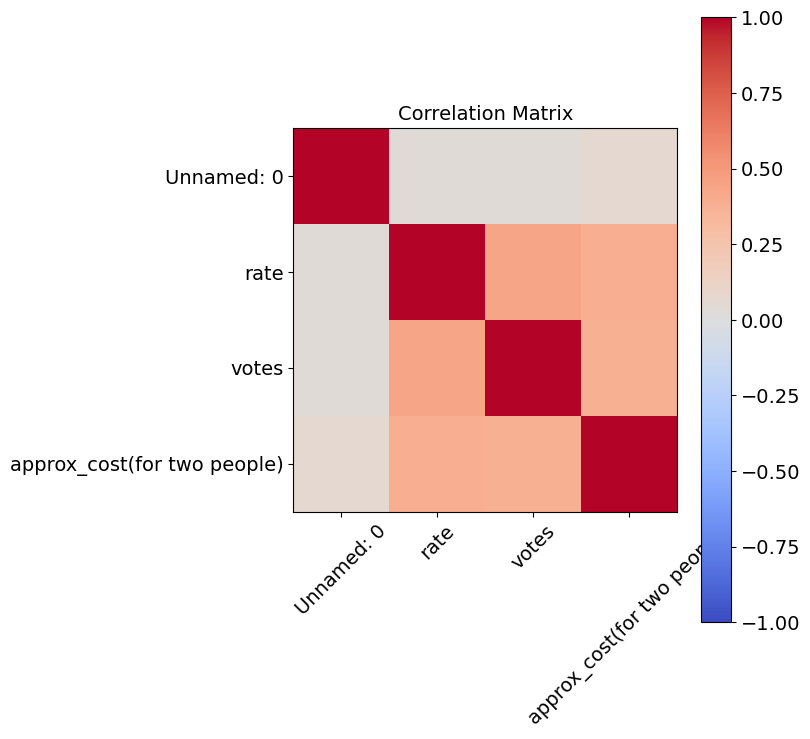

In [50]:
f = plt.figure(figsize=(8, 8))  # figure size 

# Calculate correlation matrix explicitly first
corr_matrix = df_numeric.corr()

# Replace NaN values with 0 to avoid ambiguity errors
corr_matrix = corr_matrix.fillna(0)

# Plot the correlation matrix using imshow instead of matshow for better compatibility
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)  # type of plot with explicit color range

# Add axis labels
plt.xticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=14, rotation=45)  # x axis labels
plt.yticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=14)  # y axis labels

# Add colorbar and title
cb = plt.colorbar()  # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14)  # add font size
plt.title('Correlation Matrix', fontsize=14)  # add title

# Display the plot
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()  # Explicitly show the plot

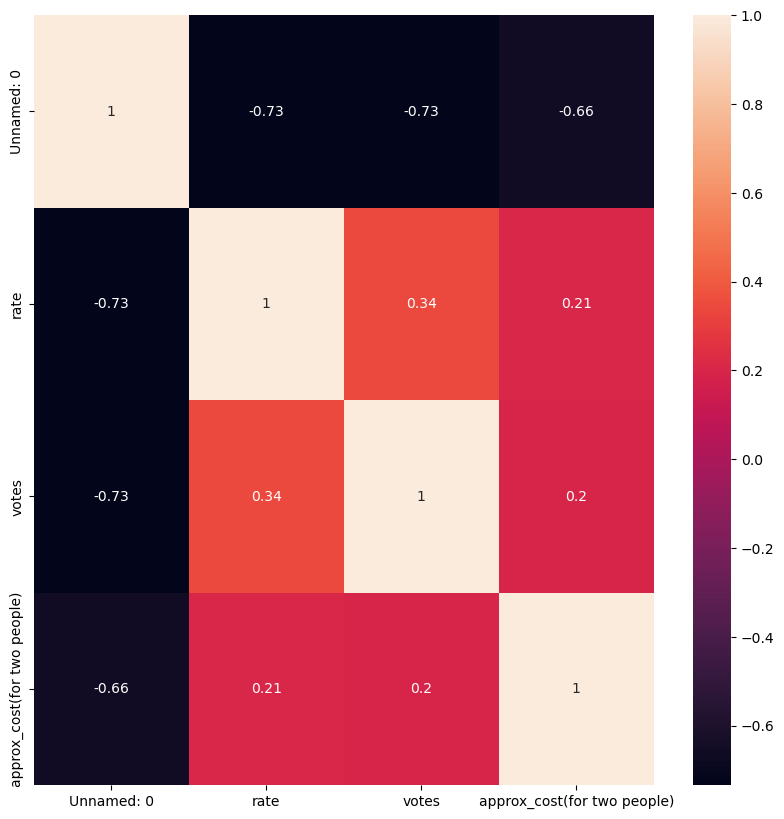

In [51]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(corr_matrix.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

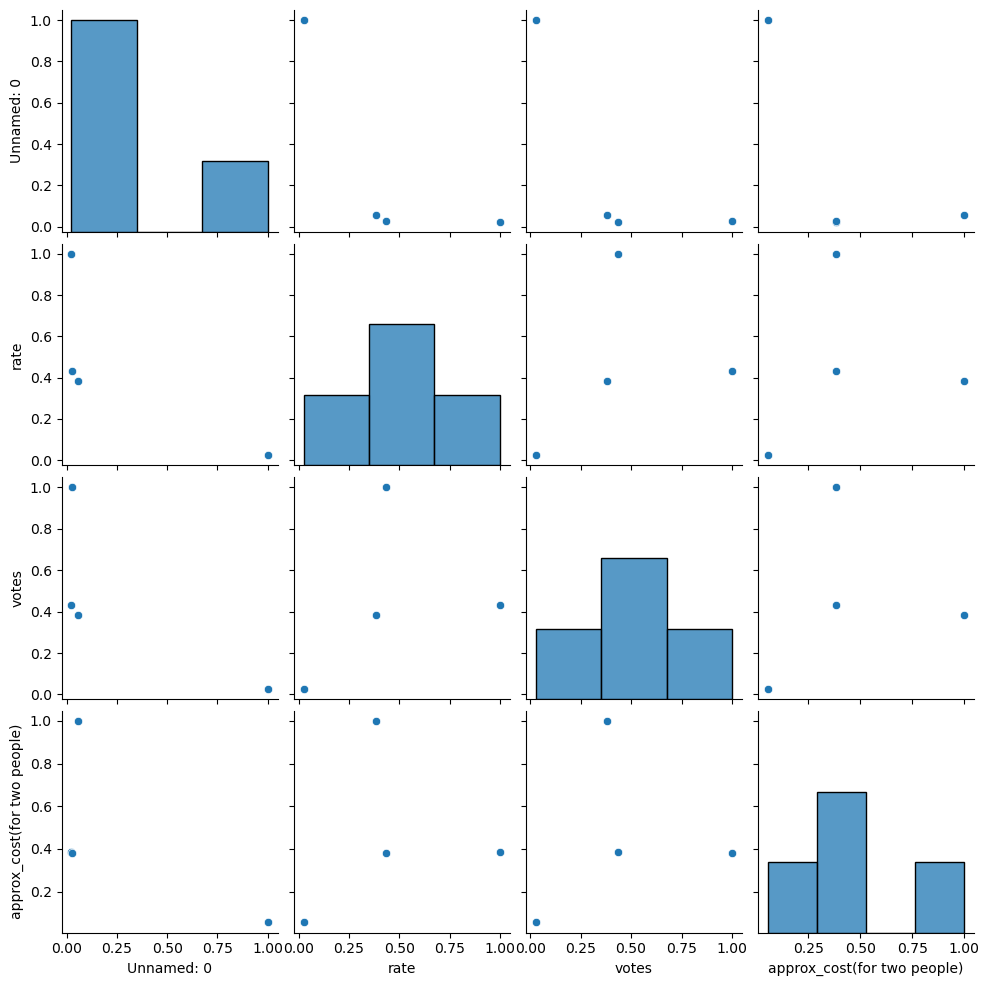

In [52]:
# Create a pair plot 
g = sns.pairplot(corr_matrix)

In [53]:
df.loc[df['rate'] < 3.5, 'rating_category'] = 'Low rating'
df.loc[(df['rate'] >= 3.5) & (df['rate'] < 4), 'rating_category'] = 'Average rating'
df.loc[df['rate'] >= 4, 'rating_category'] = 'High rating'

In [54]:
df['rating_category'].value_counts(dropna = False)

rating_category
Average rating    17766
High rating       12399
Low rating        11500
NaN               10052
Name: count, dtype: int64

In [ ]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(y="approx_cost(for two people)", x="votes", hue="rating_category", data=df)

In [ ]:
# since the chart is not too legible, and there are a lot of values in the x-axis, will try the same with a scatter plot for better readability

In [ ]:
plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=df,
    x='votes',
    y='approx_cost(for two people)',
    hue='rating_category',
    alpha=0.6,
    s=30  # marker size
)

plt.xlabel('Votes', fontsize=12)
plt.ylabel('Approx. Cost (for Two People)', fontsize=12)
plt.title('Votes vs Approx. Cost by Rating Category', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Rating Category')
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'zomato_clean.csv'))